In [4]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Wczytywanie danych

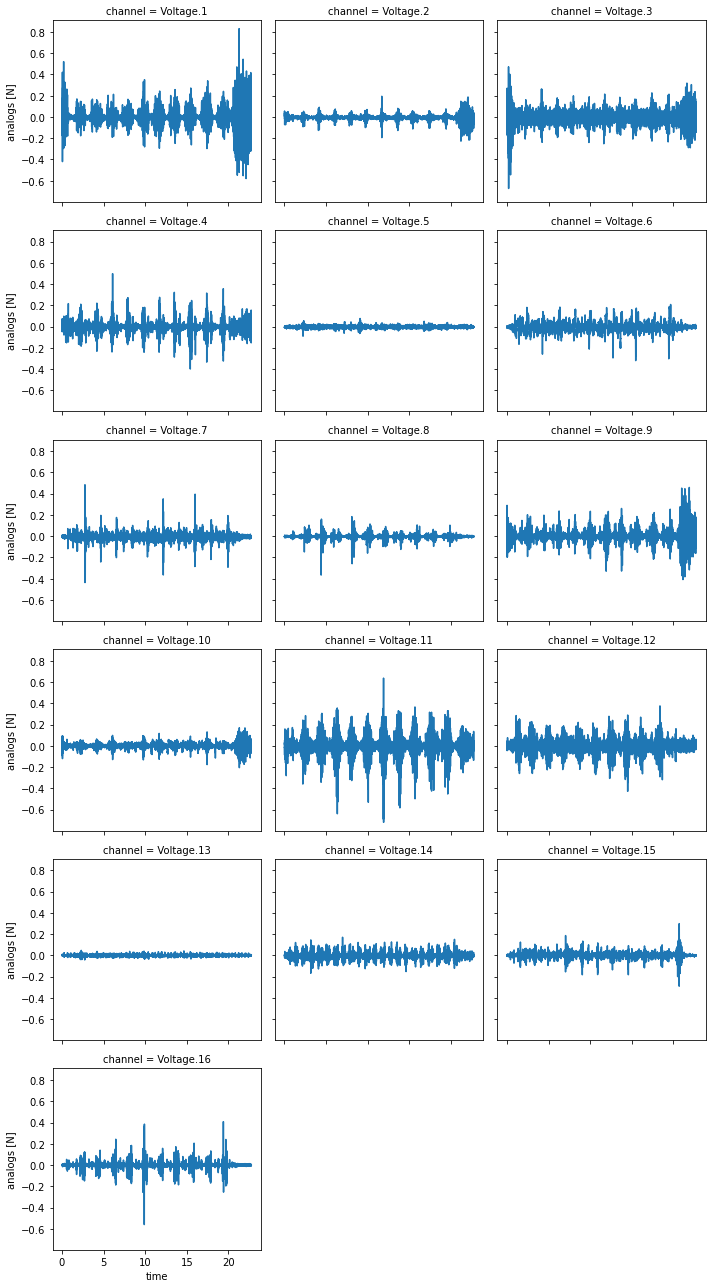

In [5]:
from pyomeca import Analogs
#from pyomeca import Markers

data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T02.c3d"
#markers = Markers.from_c3d(data_path, prefix_delimiter=":")
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
emg.plot(x="time", col="channel", col_wrap=3)

# Przetwarzanie wykresów

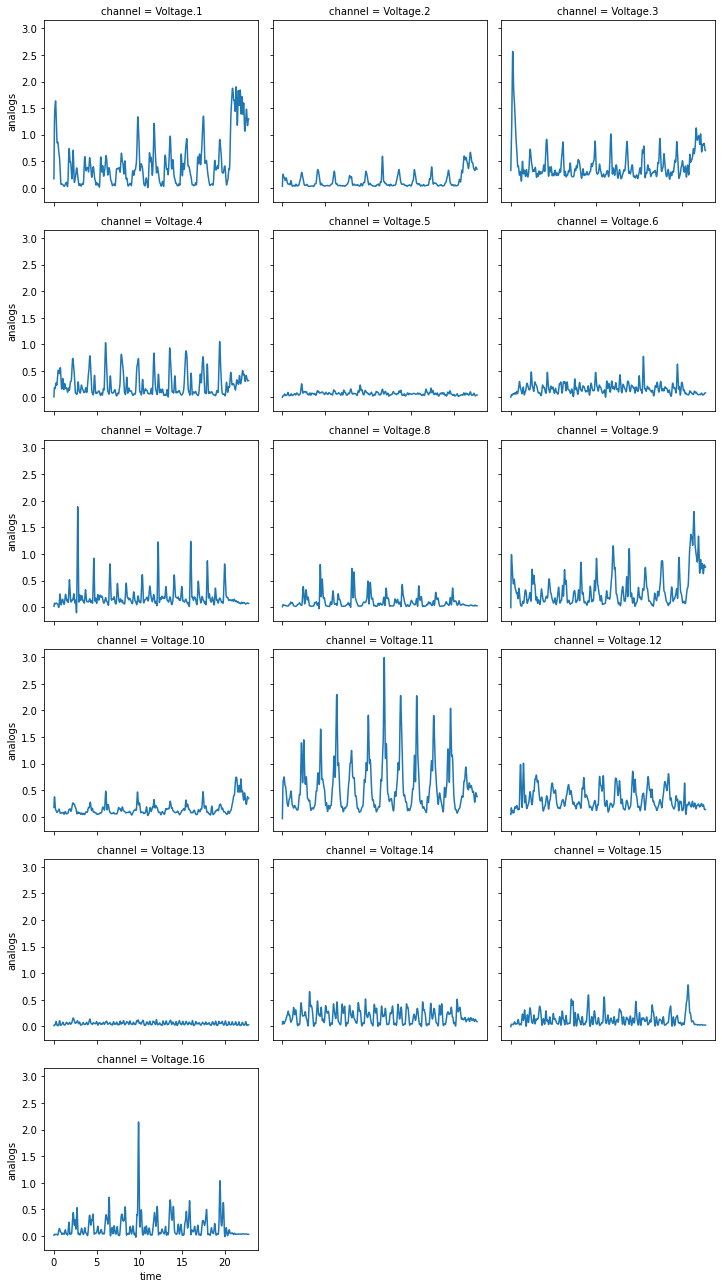

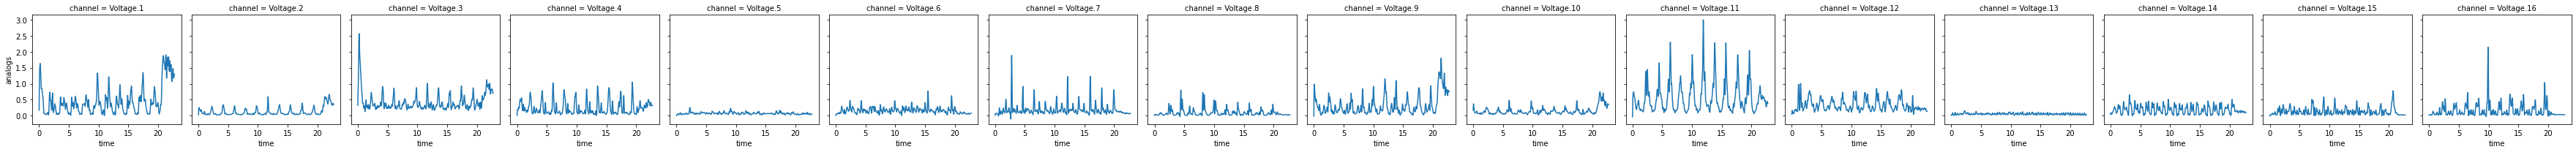

In [6]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(8)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)

emg_processed.plot(col="channel")

# Podpisanie wykresów

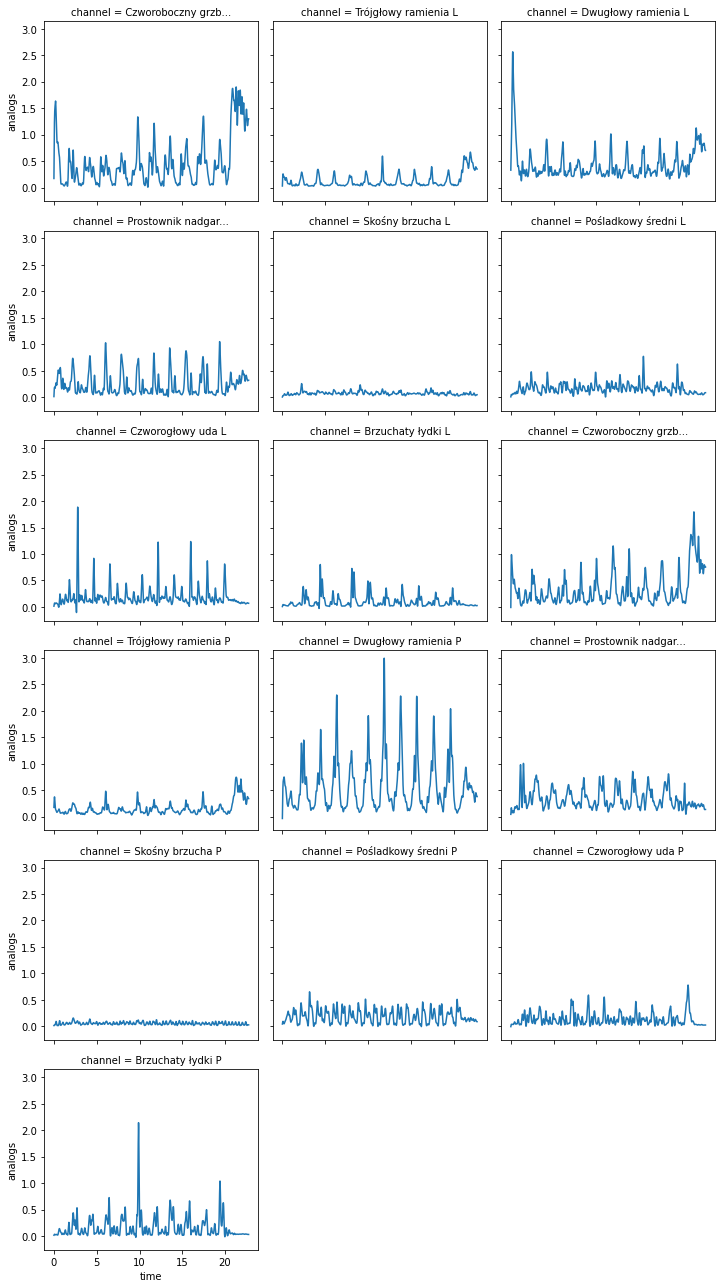

In [7]:
#emg_processed[0].plot()

emg_processed.indexes
emg_processed['channel'] = muscles_names
emg_processed.plot(x="time", col="channel", col_wrap=3)

# Funkcja odczytująca eventy

In [15]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

In [21]:
read_labels(data_path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike'],
 array([ 1755.,  3515.,  5360.,  7250.,  9095., 10985., 12895., 14805.,
        16655., 18740., 20280.,  2450.,  4360.,  6230.,  7965.,  9855.,
        11830., 13810., 15675., 17610., 19630.])]

In [23]:
import data_procesing as dp
import numpy as np
import importlib

In [24]:
importlib.reload(dp)
data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T02.c3d"
eventy = dp.read_labels(data_path)
print(eventy[1])

print(eventy[0][15])
print(eventy[0][:])
eventy[0].index('Foot Strike')


indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
print(indxE)
indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]
print(indxFS)

CzasFS = np.zeros(len(indxFS))
for i in range(len(indxFS)):
    print(indxFS[i])
    CzasFS[i] = eventy[1][indxFS[i]]
print('Czasy Foot Strikeów',CzasFS)

CzasE = np.zeros(len(indxE))
for i in range(len(indxE)):
    print(indxE[i])
    CzasE[i] = eventy[1][indxE[i]]
print('Czasy Eventów:',CzasE)
print(eventy[1])
eventy[1].sort()
print(eventy[1])

[ 1755.  3515.  5360.  7250.  9095. 10985. 12895. 14805. 16655. 18740.
 20280.  2450.  4360.  6230.  7965.  9855. 11830. 13810. 15675. 17610.
 19630.]
Foot Strike
['Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
11
12
13
14
15
16
17
18
19
20
Czasy Foot Strikeów [ 2450.  4360.  6230.  7965.  9855. 11830. 13810. 15675. 17610. 19630.]
0
1
2
3
4
5
6
7
8
9
10
Czasy Eventów: [ 1755.  3515.  5360.  7250.  9095. 10985. 12895. 14805. 16655. 18740.
 20280.]
[ 1755.  3515.  5360.  7250.  9095. 10985. 12895. 14805. 16655. 18740.
 20280.  2450.  4360.  6230.  7965.  9855. 11830. 13810. 15675. 17610.
 19630.]
[ 1755.  2450.  3515.  4360.  5360.  6230.  7250.  7965.  9095.  9855.
 10985. 11830. 12895. 13810. 14805. 15675. 16655.

In [25]:
p=np.zeros(10)
d=np.zeros(10)
j=0
for i in range(len(eventy[1])):
    if not i >= len(eventy[1])-2:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        trzeci = eventy[1][i+2]
        if pierwszy in CzasE:
            if drugi in CzasFS:
                if trzeci in CzasE:
                    p[j]=pierwszy
                    d[j]=trzeci
                    j+=1
p=p.astype(int)
d=d.astype(int)

[ 1755  3515  5360  7250  9095 10985 12895 14805 16655 18740]


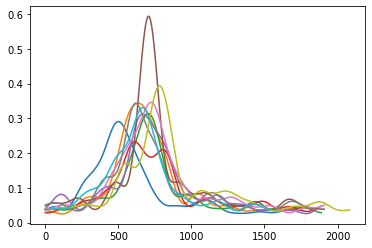

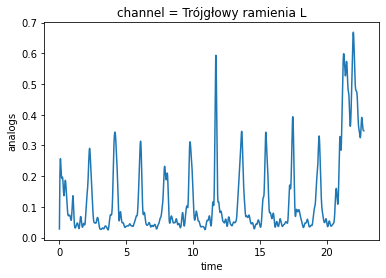

In [31]:
num=1
print(p)
for i in range(10):
         plt.plot(emg_processed[num][p[i]:d[i]])
        
plt.show()
emg_processed[num].plot(x="time")

In [14]:
print(d)


[ 490  872 1246 1593 1971 2366 2762 3135 3522 3926    0    0    0    0
    0    0    0    0    0    0]


In [27]:
emg.shape

(16, 22745)